In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reading data

In [125]:
df = pd.read_csv("./onlinefoods.csv")
df.describe()
# df.info()
df.drop(columns={'Unnamed: 12'},inplace=True)
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
373,30,Male,Married,Self Employeed,More than 50000,Graduate,1,13.0809,77.5565,560097,No,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
82,23,Male,Single,Student,No Income,Post Graduate,3,12.9343,77.6044,560029,Yes,Positive
34,22,Female,Single,Student,No Income,Post Graduate,2,12.9119,77.6446,560102,Yes,Positive
214,24,Female,Single,Employee,10001 to 25000,Post Graduate,4,12.9337,77.5900,560011,Yes,Positive


##### data visualization:

In [126]:
columns = df.columns
columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

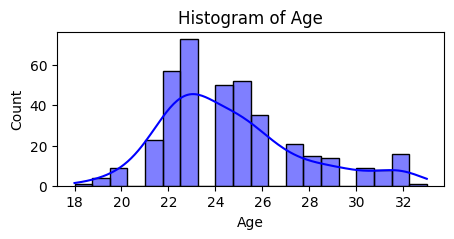

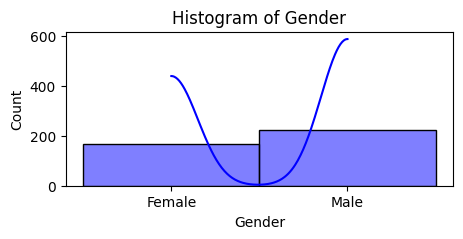

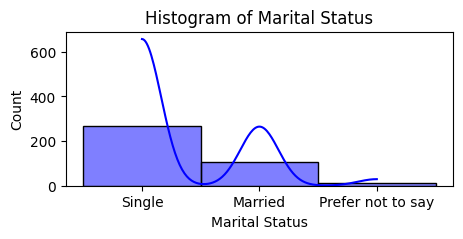

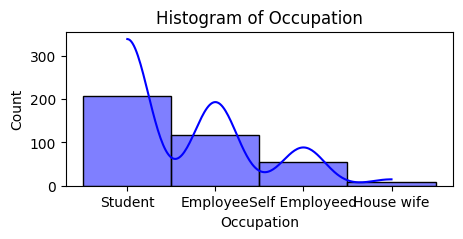

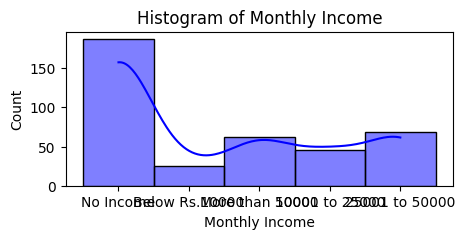

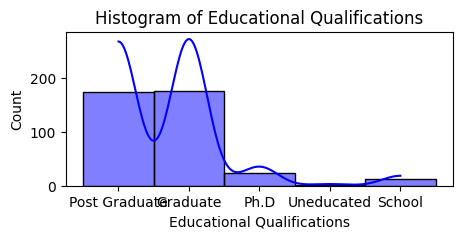

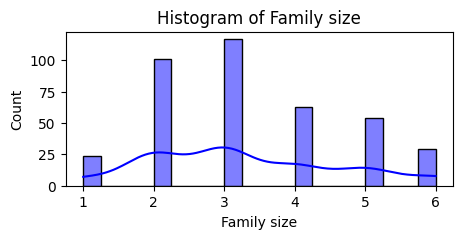

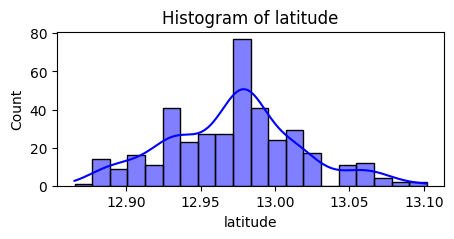

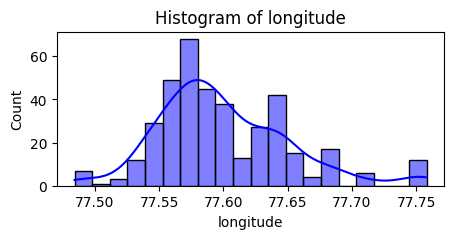

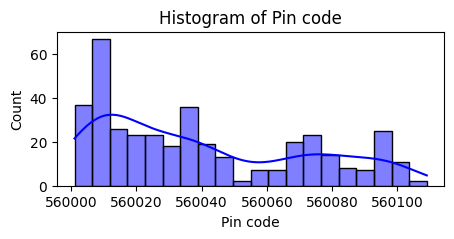

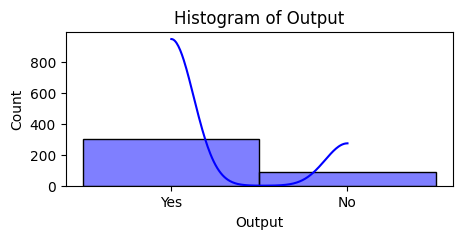

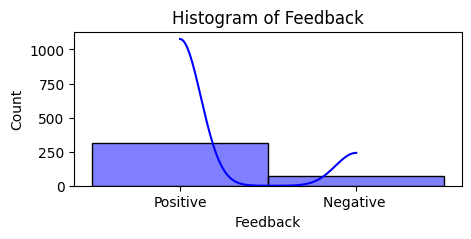

In [127]:
for column in columns:
    plt.figure(figsize=(5, 2)) 
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

##### preprocessing:

In [128]:
df.duplicated().sum()

103

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
cat_columns=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_columns.append(col)
print(cat_columns)
for column in cat_columns:
    lable_encoder=LabelEncoder()
    df[column]=lable_encoder.fit_transform(df[column])
df.sample(5)

['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
63,23,1,2,3,4,0,4,12.9343,77.6044,560029,1,1
267,25,0,2,0,1,2,2,12.9967,77.7582,560067,1,1
106,26,1,2,0,3,2,2,12.9698,77.7500,560066,0,1
168,25,1,0,2,3,3,2,13.0626,77.5284,560015,1,1
222,26,1,0,0,0,0,4,12.9105,77.4842,560060,0,1


In [135]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(df)

array([[-1.54076146, -1.16420441,  0.7004557 , ..., -1.18238526,
         0.5597893 ,  0.48349378],
       [-0.22308099, -1.16420441,  0.7004557 , ..., -0.92166588,
         0.5597893 ,  0.48349378],
       [-0.88192123,  0.85895569,  0.7004557 , ..., -0.6609465 ,
         0.5597893 , -2.06827894],
       ...,
       [ 1.75343971,  0.85895569, -1.48129156, ...,  1.88106746,
         0.5597893 ,  0.48349378],
       [-1.21134135,  0.85895569,  0.7004557 , ...,  1.78329769,
         0.5597893 , -2.06827894],
       [-0.55250111,  0.85895569,  0.7004557 , ..., -0.92166588,
         0.5597893 ,  0.48349378]])

In [136]:
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
47,23,1,2,3,4,2,2,12.9770,77.5773,560009,1,1
40,30,1,0,2,3,4,4,12.9662,77.6068,560025,1,0
255,27,1,0,2,3,0,3,12.9890,77.5332,560079,1,1
355,21,1,2,3,4,0,2,13.0012,77.5995,560046,0,1
225,28,1,2,2,0,2,2,12.9149,77.5635,560070,1,1
